# Destek Vektör Makineleri (SVM)

***Amaç iki sınıf arasındaki ayrımın optimum olmasını sağlayacak hiper-düzlemi bulmaktır.***

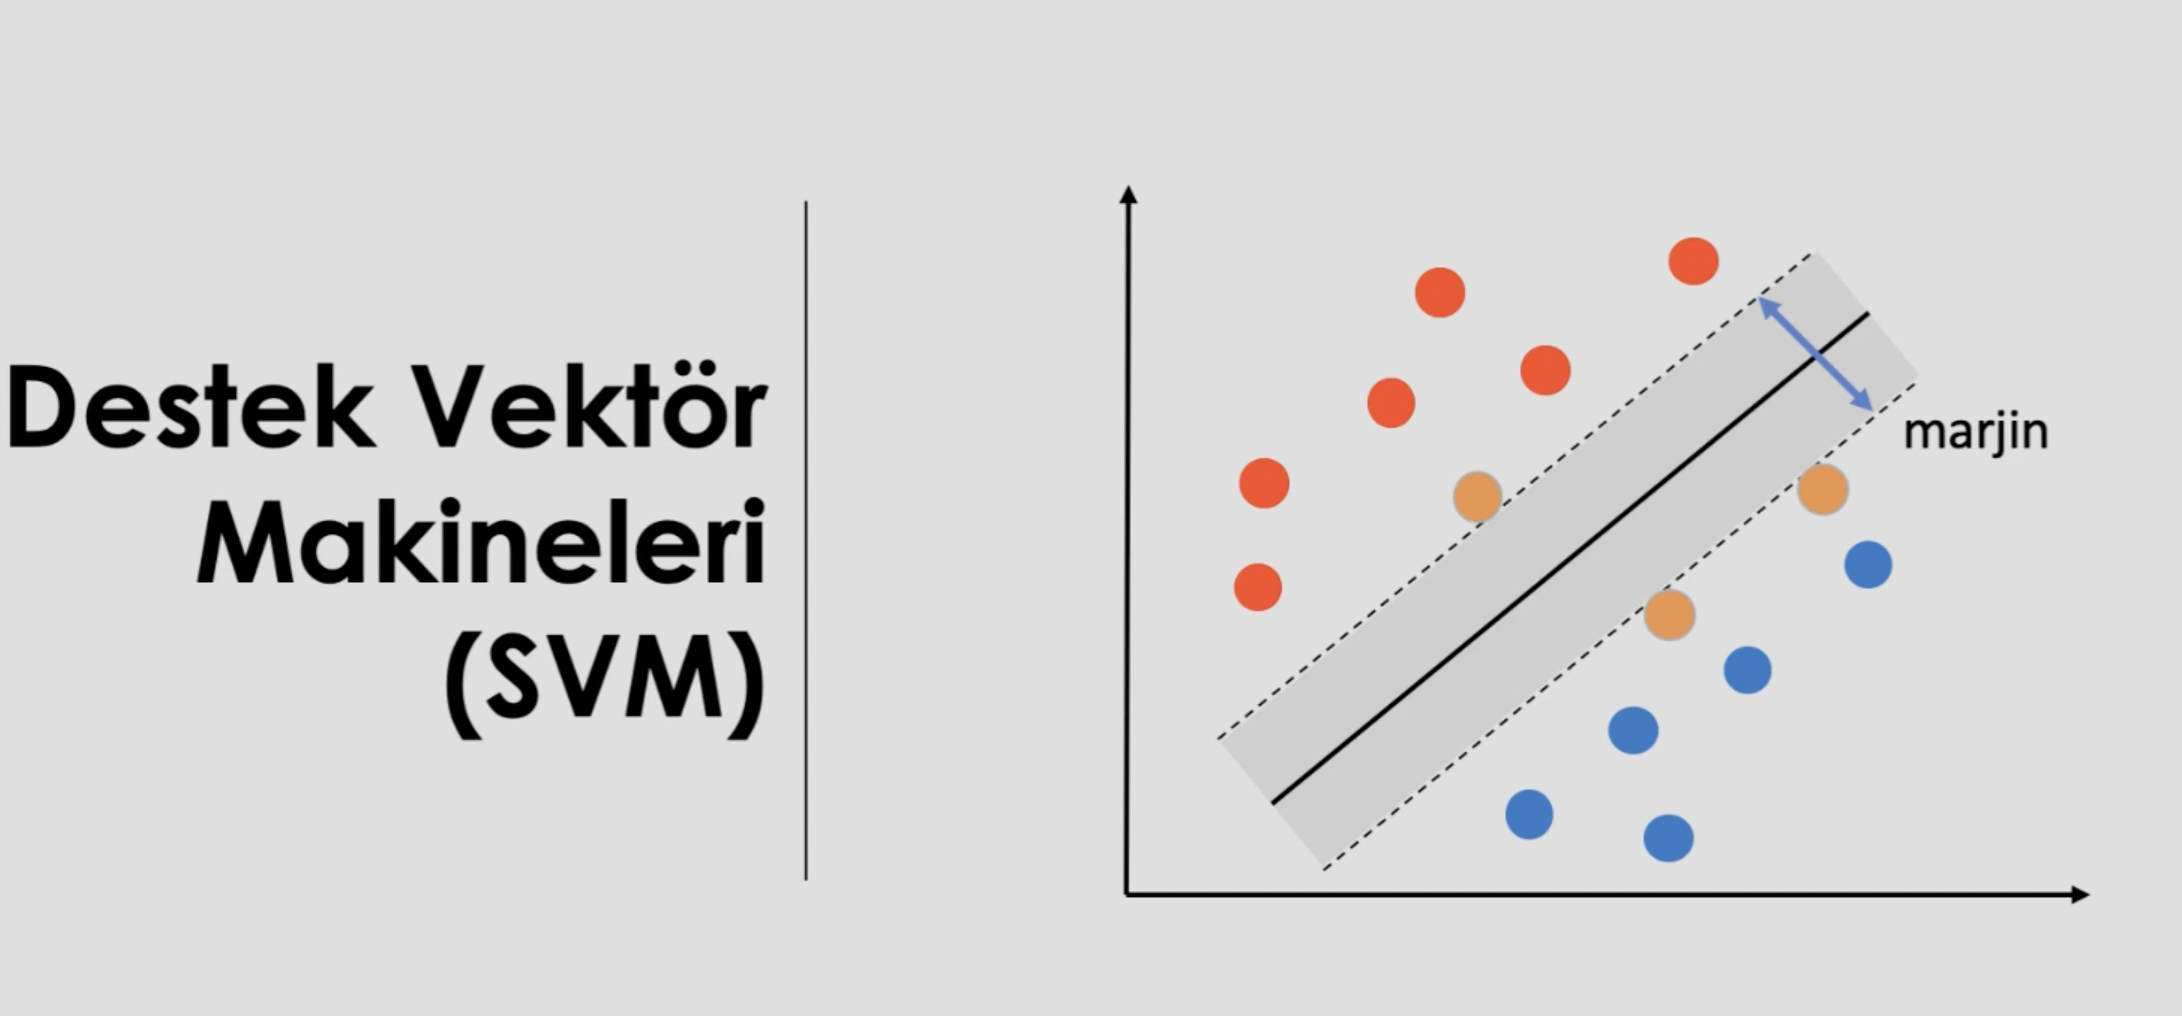

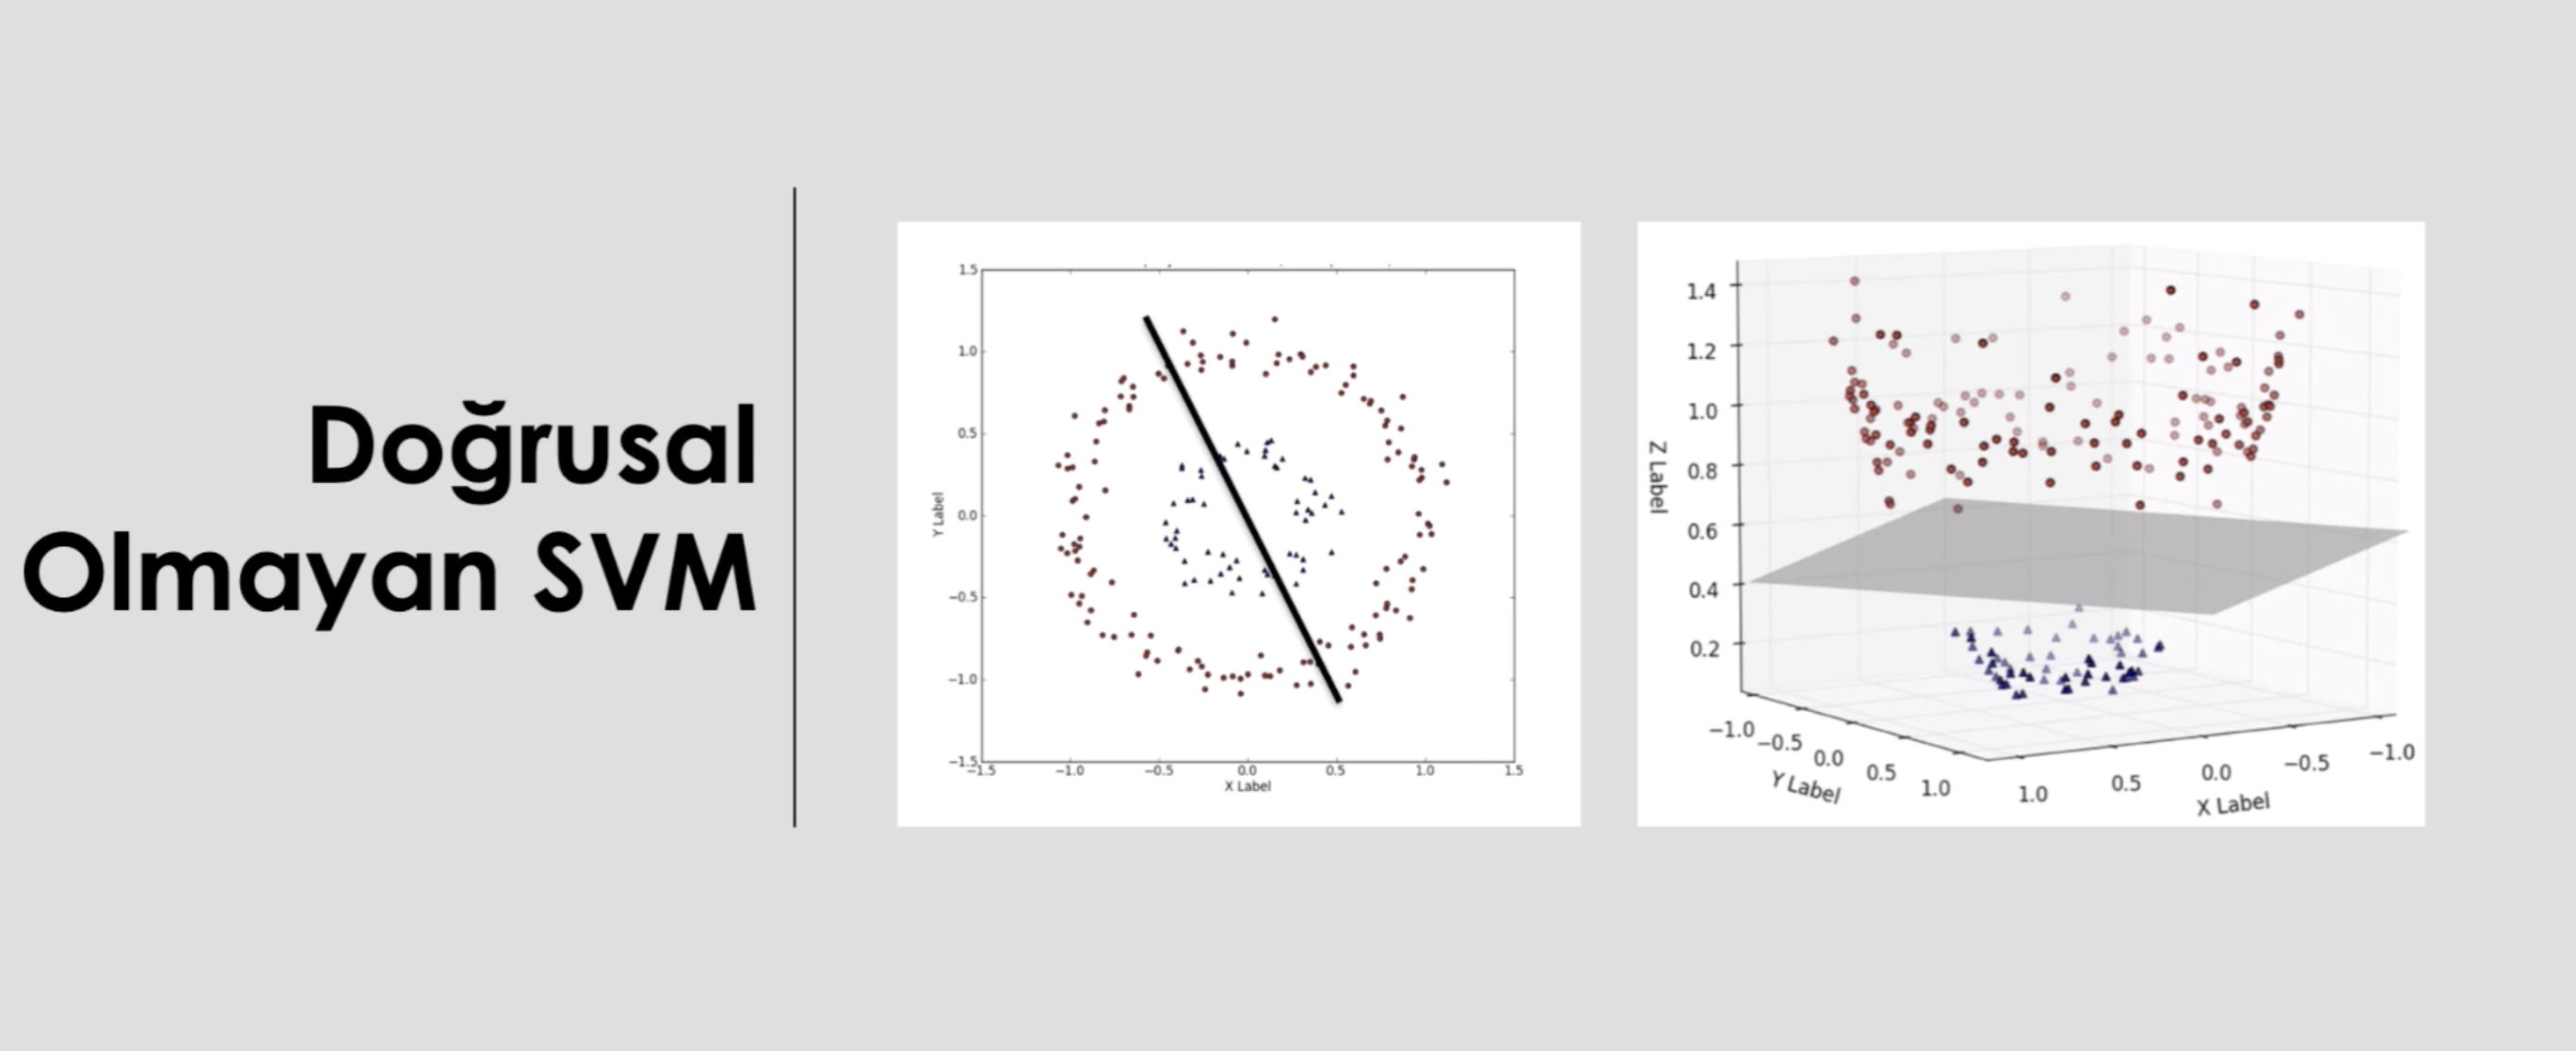

# Model & Tahmin

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

diabetes = pd.read_csv("diabetes.csv")

In [2]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [3]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [4]:
svm_model

SVC(kernel='linear')

In [5]:
y_pred = svm_model.predict(X_test)

In [6]:
accuracy_score(y_test, y_pred)

0.7445887445887446

_Accuracy Score 0 ile 1 arasındadır. Model 1e ne kadar yakınsa o kadar iyidir._

# Model Tuning

In [7]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [13]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 1}


In [14]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(X_train, y_train)

In [16]:
y_pred1 = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

[CV] END ................................................C=1; total time=   1.7s
[CV] END ................................................C=1; total time=   3.6s
[CV] END ................................................C=2; total time=   4.8s
[CV] END ................................................C=3; total time=   4.6s
[CV] END ................................................C=3; total time=   6.5s
[CV] END ................................................C=4; total time=  11.3s
[CV] END ................................................C=5; total time=  13.2s
[CV] END ................................................C=6; total time=  25.5s
[CV] END ................................................C=7; total time=  14.1s
[CV] END ................................................C=7; total time=  20.7s
[CV] END ................................................C=8; total time=  43.9s
[CV] END ................................................C=9; total time=  29.6s
[CV] END ...................

# RBF SVC

# Model & Tahmin

In [28]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [29]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [30]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# Model Tuning

In [31]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [32]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [33]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.0001}


In [34]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [35]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END ..............................C=0.0001, gamma=0.001; total time=   0.0s
[CV] END ..............................C=0.0001, gamma=0.001; total time=   0.0s
[CV] END ................................C=0.0001, gamma=0.1; total time=   0.0s
[CV] END ................................C=0.0001, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.0001, gamma=1; total time=   0.0s
[CV] END ..................................C=0.0001, gamma=5; total time=   0.0s
[CV] END .................................C=0.0001, gamma=10; total time=   0.0s
[CV] END .................................C=0.0001, gamma=10; total time=   0.0s
[CV] END ................................C=0.0001, gamma=100; total time=   0.0s
[CV] END ................................C=0.0001, gamma=100; total time=   0.0s
[CV] END ..............................C=0.001, gamma=0.0001; total time=   0.0s
[CV] END ...................